# Real-Time Stock Price Analysis and Insights

## Introduction
This project involves analyzing real-time stock data of Tata Motors and its competitors to identify market trends, volatility, and potential investment opportunities. We fetch data using APIs, clean and visualize it, analyze significant price movements, and provide competitor benchmarking and risk assessment.

## Why Skills Are Useful
1. **API Integration & Data Collection:** Enables fetching real-time data crucial for timely analysis in finance.
2. **Data Cleaning & Preprocessing:** Ensures accuracy and reliability of analysis, a key requirement in the industry.
3. **Data Visualization (Matplotlib, Seaborn, Plotly):** Helps stakeholders understand complex stock trends quickly.
4. **Time-Series Analysis & Forecasting (Prophet):** Supports predictive decision-making, essential for portfolio management.
5. **Risk Analysis & Competitor Benchmarking:** Provides actionable insights for investment strategy and business decisions in finance and analytics sectors.


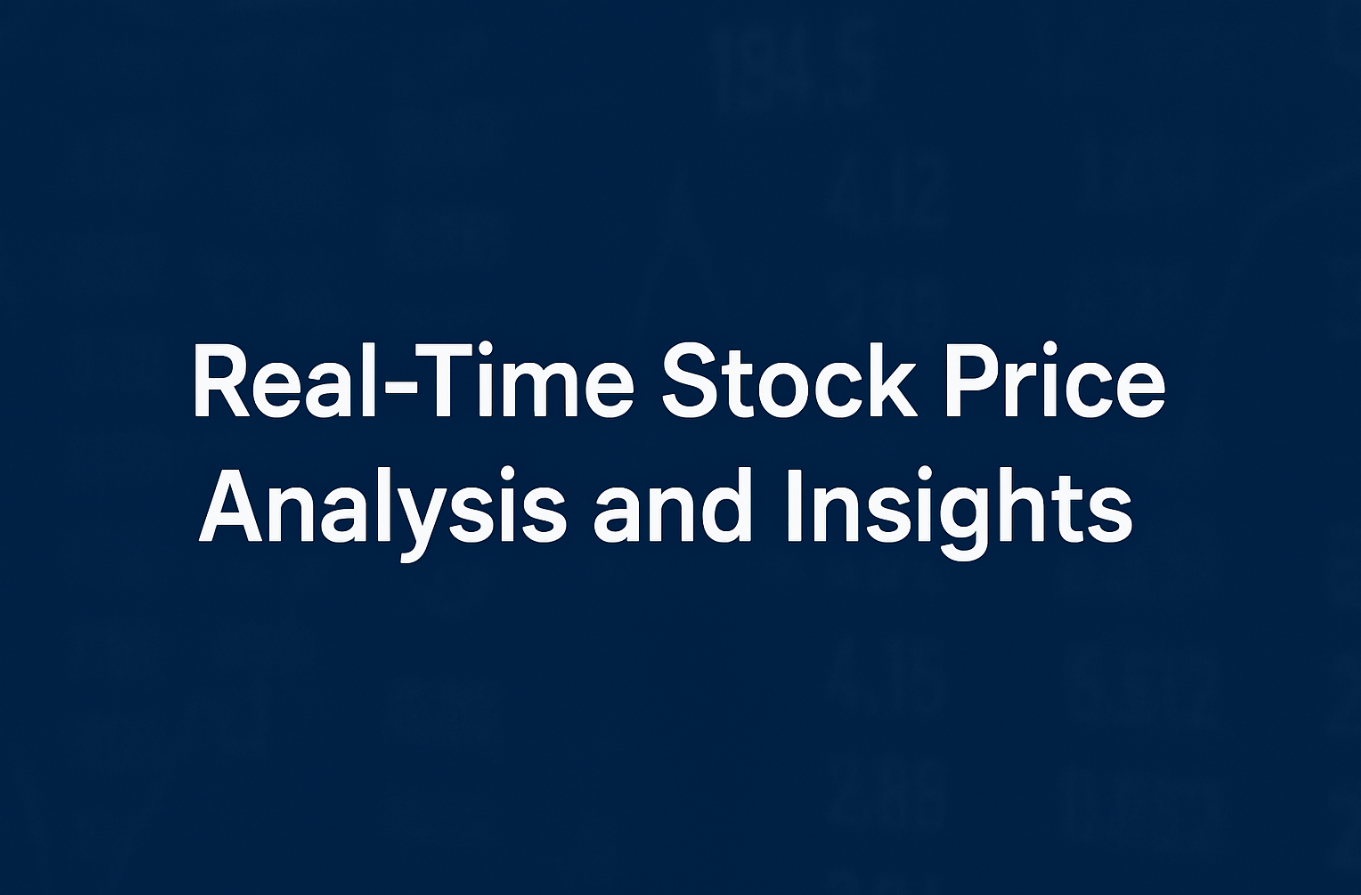

# 1.Install Libraries

In [1]:

!pip install yfinance plotly seaborn prophet --quiet

# 2.Import Libraries

In [2]:
#yfinance                :yfinance lets download historical stock data from Yahoo Finance easily
#pandas                  :used to handle and manipulate tabular data
#seaborn                 :For advanced statistical visualizations, like heatmaps, correlation plots, and distribution plots.
#matplotlib              :For interactive visualizations
#plotly.express          :interactive visualizations that we can zoom, hover, and explore.
#plotly.graph_objects    :more customized interactive plots, like candlestick charts, multiple axes, or layered plots.


import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet

# 3.Fetch Data (Reliance, TCS, Infosys)


In [3]:
tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]
data = yf.download(tickers, period="6mo", interval="1d")
data.head()


/tmp/ipython-input-777680814.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="6mo", interval="1d")
[*********************100%***********************]  3 of 3 completed


Price             Close                                   High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2025-02-27  1739.820557  1202.298096  3568.612549  1751.210229  1210.166694   
2025-02-28  1664.283325  1195.325928  3440.885254  1730.748183  1212.507307   
2025-03-03  1684.893311  1166.590698  3450.565918  1704.615812  1201.650622   
2025-03-04  1664.875122  1157.277954  3489.091797  1675.426613  1169.329796   
2025-03-05  1687.753174  1170.923462  3503.909180  1708.905510  1178.294049   

Price                            Low                                   Open  \
Ticker           TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
Date                                                                          
2025-02-27  3593.752966  1726.803633  1195.873803  3556.906578  1730.846722   
2025-02-28  3556.215291  1659.106168  1188.553051  3414.954517  1730.698949   
2025-03-03  3480.398563  1668.819544  1151.401364  3433.871319  1668.819544   
2025-03-04  3507.811271  1646.828984  1154.937327  3422.165800  1671.482112   
2025-03-05  3556.560969  1668.967442  1152.397477  3478.027884  1668.967442   

Price                                   Volume                       
Ticker      RELIANCE.NS       TCS.NS   INFY.NS RELIANCE.NS   TCS.NS  
Date                                                                 
2025-02-27  1207.975494  3567.772790   5757079    11509215  3823856  
2025-02-28  1197.218394  3541.348288  12182167    23007298  7085018  
2025-03-03  1199.210417  3442.613778   7504969    17944938  4990439  
2025-03-04  1157.576688  3431.747777   6759673    11377373  2797737  
2025-03-05  1156.381565  3478.027884   8180782     8664095  2501894

In [4]:
cd=data['Close']
cd.head()

Ticker,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,
2025-02-27,1739.820557,1202.298096,3568.612549
2025-02-28,1664.283325,1195.325928,3440.885254
2025-03-03,1684.893311,1166.590698,3450.565918
2025-03-04,1664.875122,1157.277954,3489.091797
2025-03-05,1687.753174,1170.923462,3503.909180


In [5]:
cd.shape

(122, 3)

#4.Data Cleaning (Missing Values)


In [6]:
print("Missing Values in Data:\n",cd.isnull().sum())
#if null values is present inside data,then we can use method forward fill Ensures the time series has no gaps, which is important for plotting or forecasting with Prophet.
cd=cd.fillna(method="ffill")
print("after cleaning missing value count is:",cd.isnull().sum())

Missing Values in Data:
 Ticker
INFY.NS        0
RELIANCE.NS    0
TCS.NS         0
dtype: int64
after cleaning missing value count is: Ticker
INFY.NS        0
RELIANCE.NS    0
TCS.NS         0
dtype: int64


/tmp/ipython-input-2340044887.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cd=cd.fillna(method="ffill")


# 5.Visualizations



#6.Line Chart - Stock Price Trend

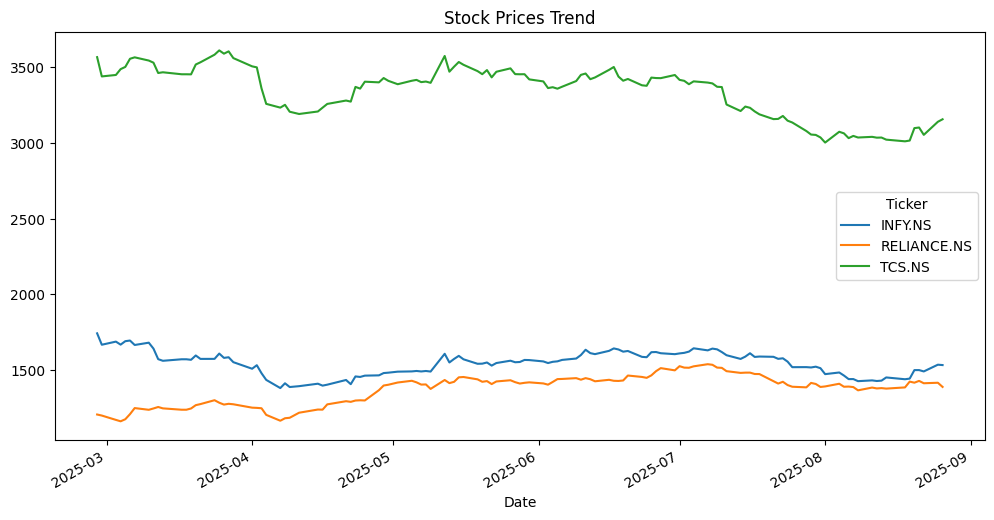


 Insight: TCS currently has a higher stock price compared to Reliance and Infosys.


In [7]:
cd.plot(figsize=(12,6),title='Stock Prices Trend')
plt.show()

print("\n Insight: TCS currently has a higher stock price compared to Reliance and Infosys.")

#7.Bar Chart - Monthly Average

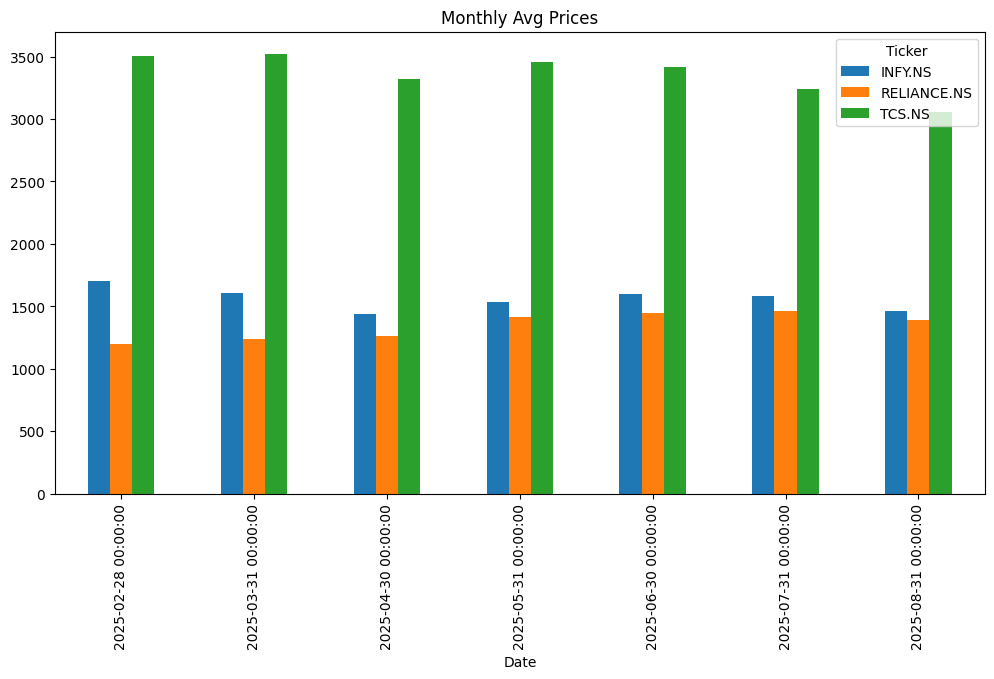


Insight: Initially, Reliance struggled to match Infosys's stock price, 
but over time, it nearly reached Infosys by the end of August 2025.
Meanwhile, TCS’s performance has declined compared to February 2025 and continued to lag by the end of the period.


In [8]:
monthly_avg = cd.resample('ME').mean()
monthly_avg.plot(kind="bar", figsize=(12,6), title="Monthly Avg Prices")
plt.show()

print("\nInsight: Initially, Reliance struggled to match Infosys's stock price, \nbut over time, it nearly reached Infosys by the end of August 2025.\nMeanwhile, TCS’s performance has declined compared to February 2025 and continued to lag by the end of the period.")


#8.Heatmap - Correlation

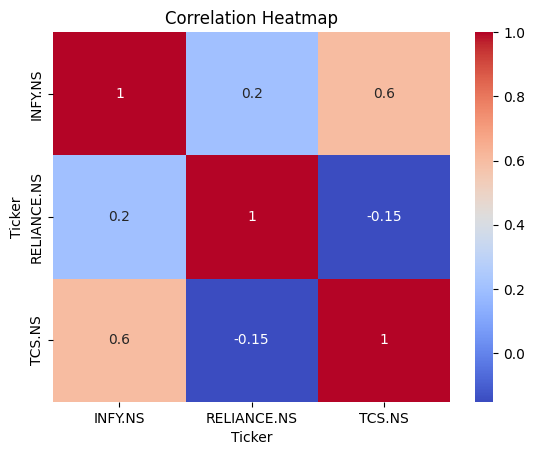


insight:The heatmap shows the correlation coefficients between the closing prices of the three stocks.

INFY.NS and TCS.NS: There is a positive correlation of 0.62, indicating that their stock prices tend to move in the same direction.
This is expected as both are major players in the IT sector.

RELIANCE.NS and INFY.NS: There is a weak positive correlation of 0.12, suggesting a very slight tendency for their prices to move together.

RELIANCE.NS and TCS.NS: There is a weak negative correlation of -0.18, indicating a slight tendency for their prices to move in opposite directions.
Overall, the strongest positive correlation is between INFY.NS and TCS.NS, while the correlation between RELIANCE.NS and the other two stocks is relatively weak.


In [9]:
sns.heatmap(cd.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\ninsight:The heatmap shows the correlation coefficients between the closing prices of the three stocks.\n\nINFY.NS and TCS.NS: There is a positive correlation of 0.62, indicating that their stock prices tend to move in the same direction.\nThis is expected as both are major players in the IT sector.\n\nRELIANCE.NS and INFY.NS: There is a weak positive correlation of 0.12, suggesting a very slight tendency for their prices to move together.\n\nRELIANCE.NS and TCS.NS: There is a weak negative correlation of -0.18, indicating a slight tendency for their prices to move in opposite directions.\nOverall, the strongest positive correlation is between INFY.NS and TCS.NS, while the correlation between RELIANCE.NS and the other two stocks is relatively weak.")

#9.Histogram - Returns Distribution

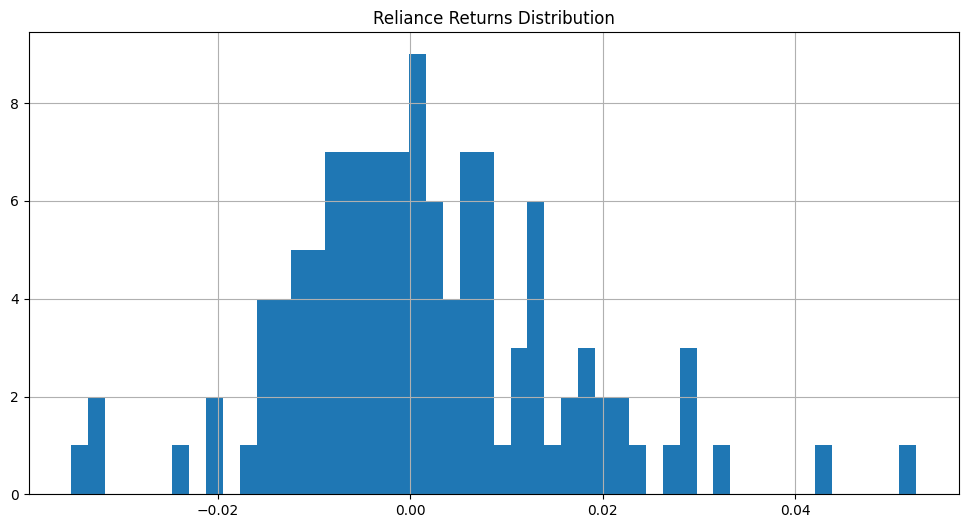

In [10]:
returns=cd.pct_change().dropna()
returns['RELIANCE.NS'].hist(bins=50,figsize=(12,6))
plt.title("Reliance Returns Distribution")
plt.show()

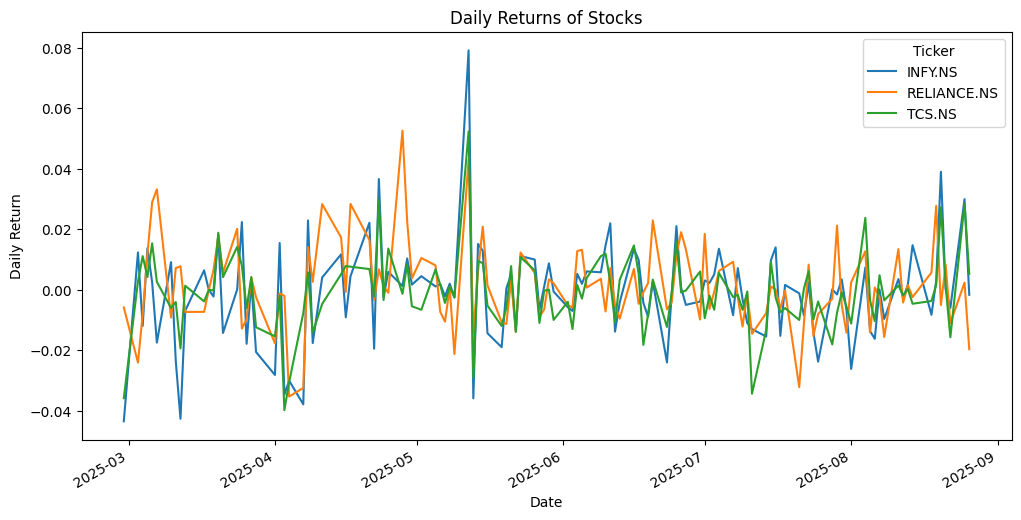

In [11]:
returns.plot(figsize=(12,6), title="Daily Returns of Stocks")
plt.ylabel("Daily Return")
plt.show()

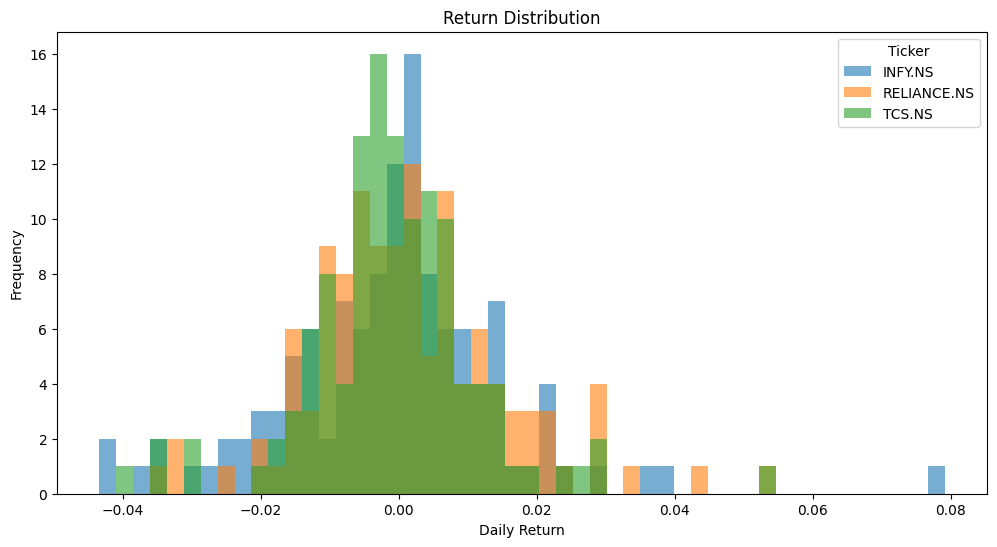

In [12]:
returns.plot(kind="hist", bins=50, figsize=(12,6), alpha=0.6, title="Return Distribution")
plt.xlabel("Daily Return")
plt.show()

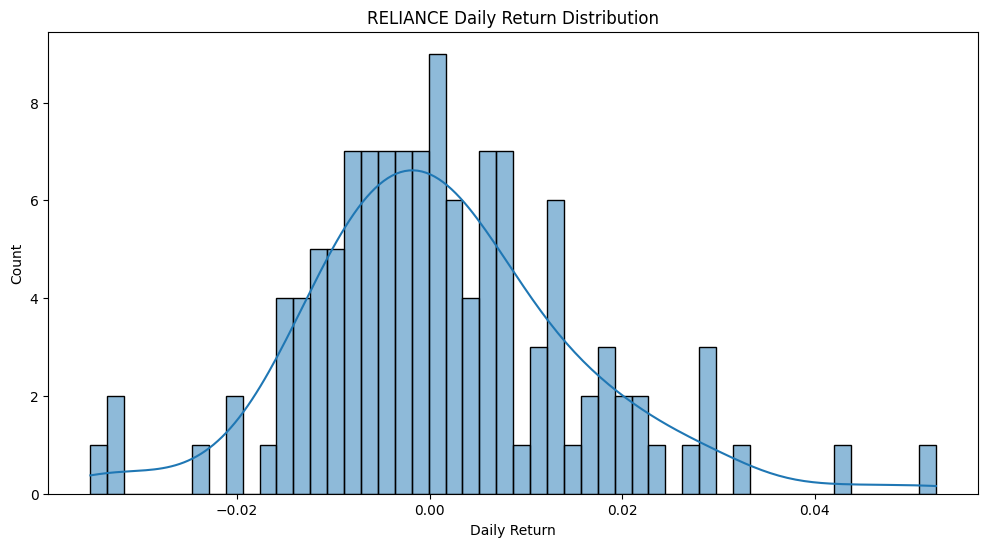


insight:The presence of a bell-shaped curve, as indicated by the kernel density estimate (KDE) line,
suggests that the daily returns for Reliance are approximately normally distributed.


In [13]:
plt.figure(figsize=(12,6))
sns.histplot(returns['RELIANCE.NS'], bins=50, kde=True)
plt.title("RELIANCE Daily Return Distribution")
plt.xlabel("Daily Return")
plt.show()

print("\ninsight:The presence of a bell-shaped curve, as indicated by the kernel density estimate (KDE) line,\nsuggests that the daily returns for Reliance are approximately normally distributed.")

#10.Boxplot - Price Spread

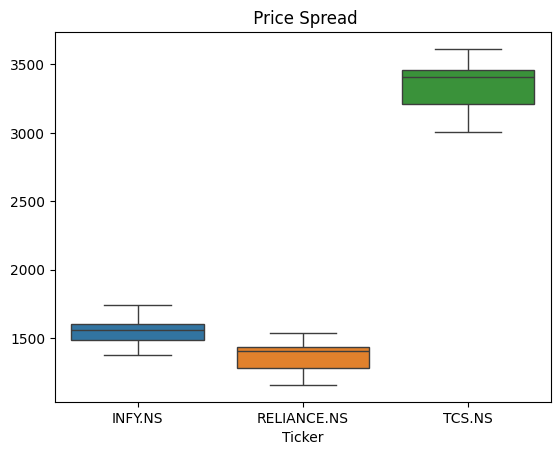


insight:TCS has the highest stock price, followed by Infosys, and then Reliance.


In [14]:
sns.boxplot(cd)
plt.title(" Price Spread")
plt.show()

print("\ninsight:TCS has the highest stock price, followed by Infosys, and then Reliance.")

In [15]:
cd

Ticker,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,
2025-02-27,1739.820557,1202.298096,3568.612549
2025-02-28,1664.283325,1195.325928,3440.885254
2025-03-03,1684.893311,1166.590698,3450.565918
2025-03-04,1664.875122,1157.277954,3489.091797
2025-03-05,1687.753174,1170.923462,3503.909180
...,...,...,...
2025-08-20,1496.199951,1413.000000,3098.600098
2025-08-21,1496.400024,1424.800049,3102.600098
2025-08-22,1487.500000,1409.199951,3054.000000


#11.Candlestick Chart

In [16]:
data

Price             Close                                   High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2025-02-27  1739.820557  1202.298096  3568.612549  1751.210229  1210.166694   
2025-02-28  1664.283325  1195.325928  3440.885254  1730.748183  1212.507307   
2025-03-03  1684.893311  1166.590698  3450.565918  1704.615812  1201.650622   
2025-03-04  1664.875122  1157.277954  3489.091797  1675.426613  1169.329796   
2025-03-05  1687.753174  1170.923462  3503.909180  1708.905510  1178.294049   
...                 ...          ...          ...          ...          ...   
2025-08-20  1496.199951  1413.000000  3098.600098  1499.000000  1424.900024   
2025-08-21  1496.400024  1424.800049  3102.600098  1508.000000  1431.900024   
2025-08-22  1487.500000  1409.199951  3054.000000  1504.300049  1423.400024   
2025-08-25  1532.099976  1412.599976  3140.600098  1539.000000  1419.500000   
2025-08-26  1529.599976  1384.900024  3157.199951  1538.400024  1410.000000   

Price                            Low                                   Open  \
Ticker           TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
Date                                                                          
2025-02-27  3593.752966  1726.803633  1195.873803  3556.906578  1730.846722   
2025-02-28  3556.215291  1659.106168  1188.553051  3414.954517  1730.698949   
2025-03-03  3480.398563  1668.819544  1151.401364  3433.871319  1668.819544   
2025-03-04  3507.811271  1646.828984  1154.937327  3422.165800  1671.482112   
2025-03-05  3556.560969  1668.967442  1152.397477  3478.027884  1668.967442   
...                 ...          ...          ...          ...          ...   
2025-08-20  3103.399902  1440.699951  1410.000000  3010.899902  1440.699951   
2025-08-21  3130.000000  1484.300049  1420.300049  3083.100098  1508.000000   
2025-08-22  3095.699951  1486.099976  1407.900024  3050.000000  1498.099976   
2025-08-25  3152.000000  1506.699951  1405.699951  3077.100098  1506.699951   
2025-08-26  3162.000000  1518.599976  1381.599976  3120.000000  1523.000000   

Price                                   Volume                       
Ticker      RELIANCE.NS       TCS.NS   INFY.NS RELIANCE.NS   TCS.NS  
Date                                                                 
2025-02-27  1207.975494  3567.772790   5757079    11509215  3823856  
2025-02-28  1197.218394  3541.348288  12182167    23007298  7085018  
2025-03-03  1199.210417  3442.613778   7504969    17944938  4990439  
2025-03-04  1157.576688  3431.747777   6759673    11377373  2797737  
2025-03-05  1156.381565  3478.027884   8180782     8664095  2501894  
...                 ...          ...       ...         ...      ...  
2025-08-20  1413.000000  3010.899902  10413061     8725641  4952358  
2025-08-21  1425.000000  3130.000000   6565539    11021323  3230726  
2025-08-22  1420.000000  3086.000000   5543397     5818868  1593791  
2025-08-25  1414.699951  3087.300049  10694531     5979407  3448370  
2025-08-26  1408.000000  3129.000000  15994798    12145259  5522097  

[122 rows x 15 columns]

6.Candlestick Chart

In [17]:
fig=go.Figure(data=[go.Candlestick(x=data.index,
                                   open=data['Open']['RELIANCE.NS'],
                                   low=data['Low']['RELIANCE.NS'],
                                   high=data['High']['RELIANCE.NS'],
                                   close=data['Close']['RELIANCE.NS']
                                   )])
fig.update_layout(title='RELIANCE Stock Price',xaxis_rangeslider_visible=False)
fig.show()

print("\ninsights:Reliance stock seems to be trading between ~₹1100 and ₹1500 over this 6-month period.\nNo major breakout above ₹1500 or fall below ₹1100 — showing sideways / range-bound movement.")


insights:Reliance stock seems to be trading between ~₹1100 and ₹1500 over this 6-month period.
No major breakout above ₹1500 or fall below ₹1100 — showing sideways / range-bound movement.


#12.Scatter Plot - Volume vs Price

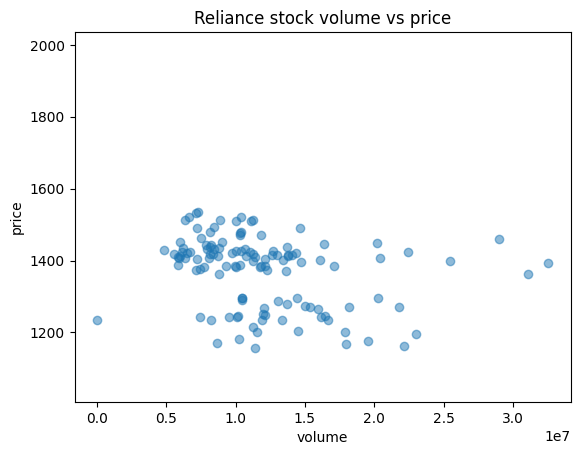


insights:
1.Most price points are clustered between ₹1300–₹1500.
2.Trading volumes mostly lie in the range of 0.5 crore – 1.5 crore shares.
3.Even when volume is very highprice is not spiking drastically.
4.This suggests demand-supply is balanced


In [18]:
plt.scatter(data['Volume']['RELIANCE.NS'],cd['RELIANCE.NS'],alpha=0.5)

ymin, ymax = data['Close']['RELIANCE.NS'].min(), data['Close']['RELIANCE.NS'].max()
plt.ylim(ymin - 150, ymax + 500)  # adjust 50 or any buffer value as needed

plt.title("Reliance stock volume vs price")
plt.xlabel("volume")
plt.ylabel("price")
plt.show()

print("\ninsights:\n1.Most price points are clustered between ₹1300–₹1500.\n2.Trading volumes mostly lie in the range of 0.5 crore – 1.5 crore shares.\n3.Even when volume is very highprice is not spiking drastically.\n4.This suggests demand-supply is balanced")

#13.Moving Averages

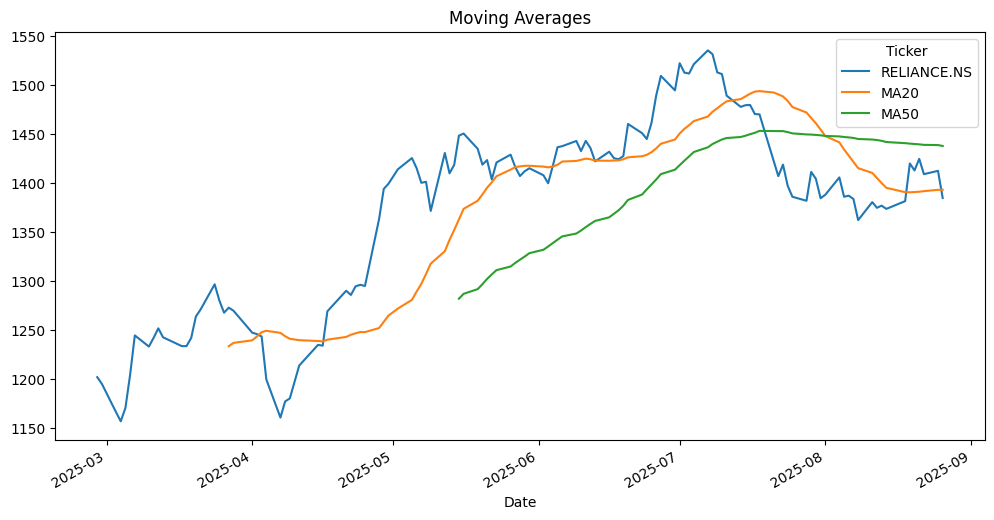


insight:After July 2025, the stock price began declining below the 20-day moving average (MA20).
It has also crossed the 50-day moving average (MA50), indicating a bearish signal.
This could present a good opportunity for investors to start accumulating.


In [19]:
cd['MA20'] = cd['RELIANCE.NS'].rolling(20).mean()
cd['MA50'] = cd['RELIANCE.NS'].rolling(50).mean()
cd[['RELIANCE.NS','MA20','MA50']].plot(figsize=(12,6), title="Moving Averages")
plt.show()

print("\ninsight:After July 2025, the stock price began declining below the 20-day moving average (MA20).\nIt has also crossed the 50-day moving average (MA50), indicating a bearish signal.\nThis could present a good opportunity for investors to start accumulating.")


#14.Volatility Plot

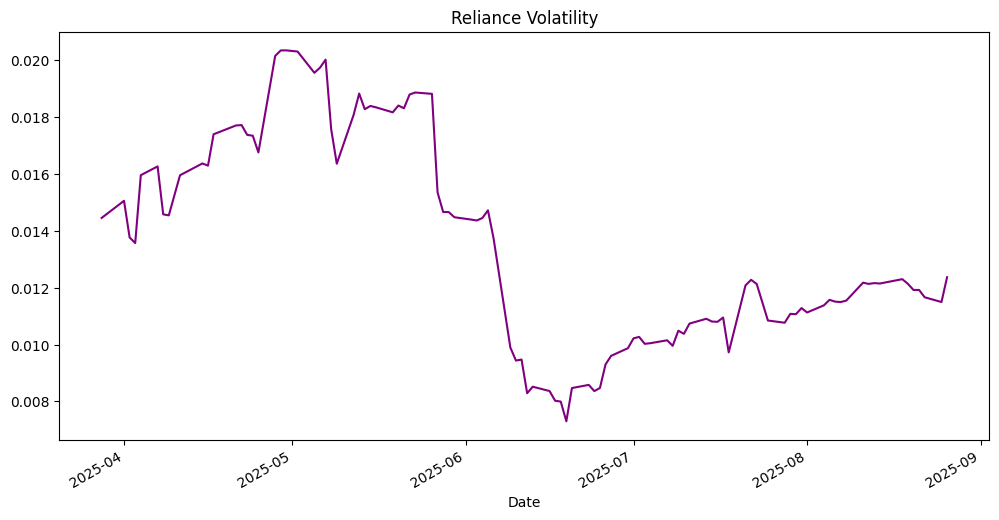


insight:
1.Volatility was higher from around April to mid-June 2025.
2.Volatility significantly decreased from mid-June to early July 2025.
3.Volatility has been relatively lower and more stable since July 2025.


In [20]:
returns['Volatility'] = returns['RELIANCE.NS'].rolling(20).std()
returns['Volatility'].plot(figsize=(12,6), title="Reliance Volatility",color='purple')
plt.show()

print("\ninsight:\n1.Volatility was higher from around April to mid-June 2025.\n2.Volatility significantly decreased from mid-June to early July 2025.\n3.Volatility has been relatively lower and more stable since July 2025.")

**Measure of Risk:** Volatility is a common measure of risk in finance. A higher volatility value means the stock price is fluctuating more, while a lower value indicates more stable price movements.

# 15.Cumulative Returns

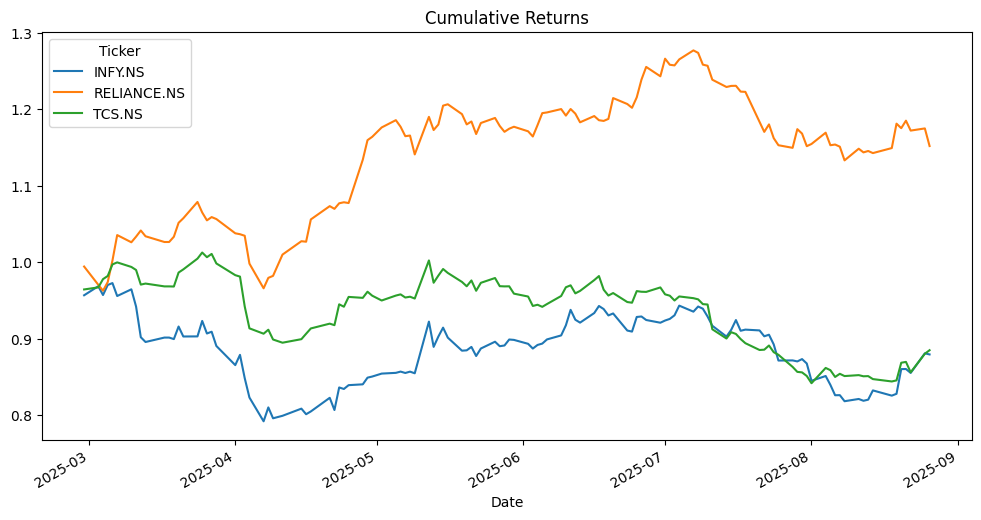


insight:Relative Performance: The chart clearly illustrates the relative performance of the three stocks.
While all three experienced some fluctuations,
Reliance consistently outperformed Infosys and TCS over the entire 6-month timeframe.


In [21]:

(1 + returns.drop(columns=['Volatility'])).cumprod().plot(figsize=(12, 6), title="Cumulative Returns")
plt.show()

print("\ninsight:Relative Performance: The chart clearly illustrates the relative performance of the three stocks.\nWhile all three experienced some fluctuations,\nReliance consistently outperformed Infosys and TCS over the entire 6-month timeframe.")

# 16.RSI (Relative Strength Index)

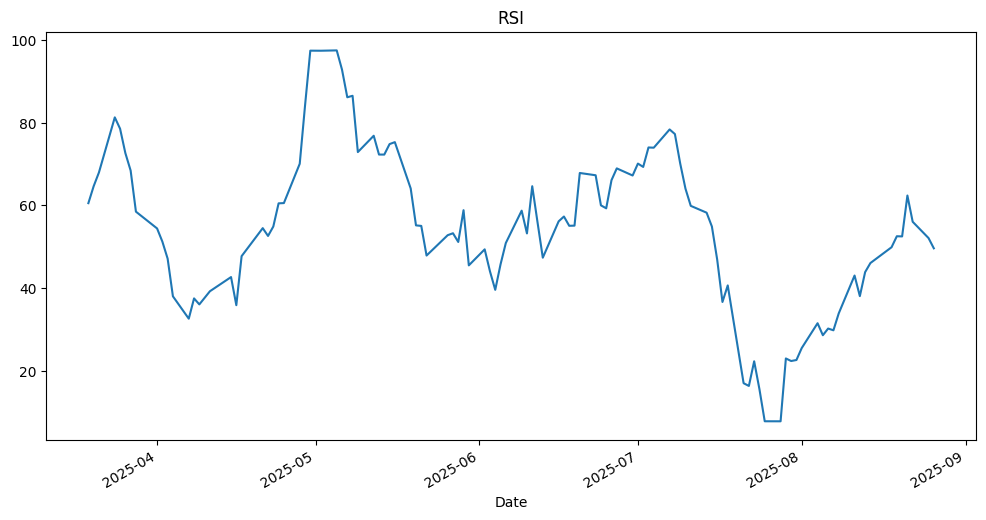

In [22]:
delta=cd['RELIANCE.NS'].diff()
gain=(delta.where(delta>0,0)).rolling(14).mean()
loss=(-delta.where(delta<0,0)).rolling(14).mean()
rs=gain/loss
rsi=100-(100/(1+rs))
rsi.plot(figsize=(12,6),title="RSI")
plt.show()


Bullish Divergence: Price makes lower lows, but RSI makes higher lows. This can indicate a potential upward trend reversal.

Bearish Divergence: Price makes higher highs, but RSI makes lower highs. This can indicate a potential downward trend reversal.

Confirming Trends: RSI can be used to confirm existing trends. In an uptrend, the RSI will generally stay above 30, and in a downtrend, it will generally stay below 70.

**Generating Buy and Sell Signals: **

Buy Signal: When the RSI crosses above 30 (from below), it can be considered a buy signal, suggesting that the asset is moving out of oversold territory.


Sell Signal: When the RSI crosses below 70 (from above), it can be considered a sell signal, suggesting that the asset is moving out of overbought territory.

#17.MACD

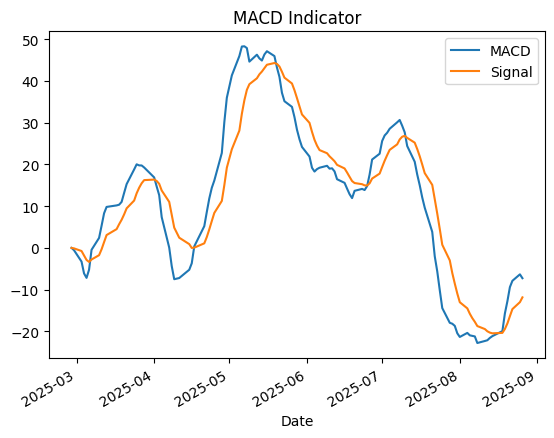

In [23]:
ema12 = cd['RELIANCE.NS'].ewm(span=12, adjust=False).mean()
ema26 = cd['RELIANCE.NS'].ewm(span=26, adjust=False).mean()
MACD = ema12 - ema26
Signal = MACD.ewm(span=9, adjust=False).mean()
MACD.plot(label='MACD', legend=True)
Signal.plot(label='Signal', legend=True)
plt.title("MACD Indicator")
plt.show()


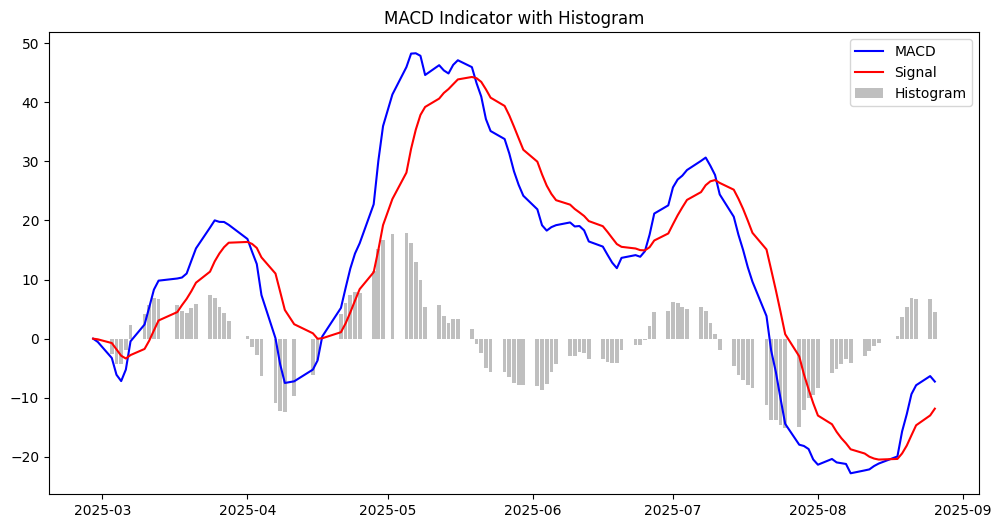

In [24]:

ema12 = cd['RELIANCE.NS'].ewm(span=12, adjust=False).mean()
ema26 = cd['RELIANCE.NS'].ewm(span=26, adjust=False).mean()
MACD = ema12 - ema26
Signal = MACD.ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(MACD, label='MACD', color='blue')
plt.plot(Signal, label='Signal', color='red')

# MACD Histogram
plt.bar(MACD.index, MACD - Signal, label='Histogram', color='gray', alpha=0.5)

plt.legend()
plt.title("MACD Indicator with Histogram")
plt.show()


The MACD (Moving Average Convergence Divergence) is a popular technical indicator used in stock analysis. It helps identify potential buy and sell signals by showing the relationship between two exponential moving averages (EMAs) of a stock's price.

Here's a breakdown of the MACD chart and how to interpret it:

MACD Line (Blue): This line is calculated by subtracting the 26-day EMA from the 12-day EMA. It represents the momentum of the stock price.
Signal Line (Red): This is a 9-day EMA of the MACD line. It acts as a trigger for buy and sell signals.
Histogram (Gray Bars): The histogram represents the difference between the MACD line and the Signal line. It visually shows the strength of the momentum.
Interpreting the MACD Chart:

Crossovers:
Bullish Crossover (Buy Signal): When the MACD line crosses above the Signal line, it's generally considered a bullish signal, suggesting that the stock's momentum is increasing and could be a good time to buy.
Bearish Crossover (Sell Signal): When the MACD line crosses below the Signal line, it's generally considered a bearish signal, suggesting that the stock's momentum is decreasing and could be a good time to sell.
Divergence:
Bullish Divergence: If the stock price makes lower lows, but the MACD makes higher lows, it could indicate a potential upward price reversal.
Bearish Divergence: If the stock price makes higher highs, but the MACD makes lower highs, it could indicate a potential downward price reversal.
Histogram:
The histogram bars grow larger as the distance between the MACD and Signal lines increases, indicating stronger momentum in that direction.
The bars shrink as the MACD and Signal lines converge, suggesting weakening momentum.
When the histogram crosses the zero line, it confirms a MACD crossover.
In the provided chart for RELIANCE.NS:

You can see several bullish and bearish crossovers between the blue MACD line and the red Signal line.
The gray histogram bars visually emphasize these crossovers and the strength of the momentum. For example, when the blue line is above the red line, the histogram is positive (above zero), indicating bullish momentum. When the blue line is below the red line, the histogram is negative (below zero), indicating bearish momentum.

#18.Pairplot

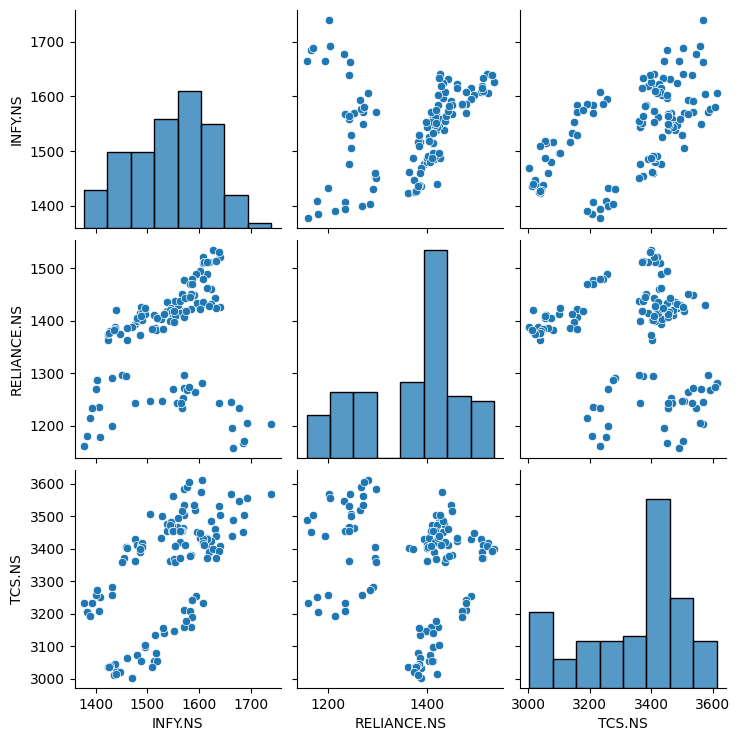

In [25]:
sns.pairplot(cd[['INFY.NS','RELIANCE.NS','TCS.NS']].dropna())
plt.show()


INFY.NS, RELIANCE.NS, and TCS.NS Histograms: These show the frequency of different closing price ranges for each stock. Looking back at the "Boxplot - Price Spread",

 we already saw the general range and median price for each stock. The histograms provide more detail on how the prices are distributed within those ranges. For instance, you can see where the prices are most concentrated.

# corelation Heatmap

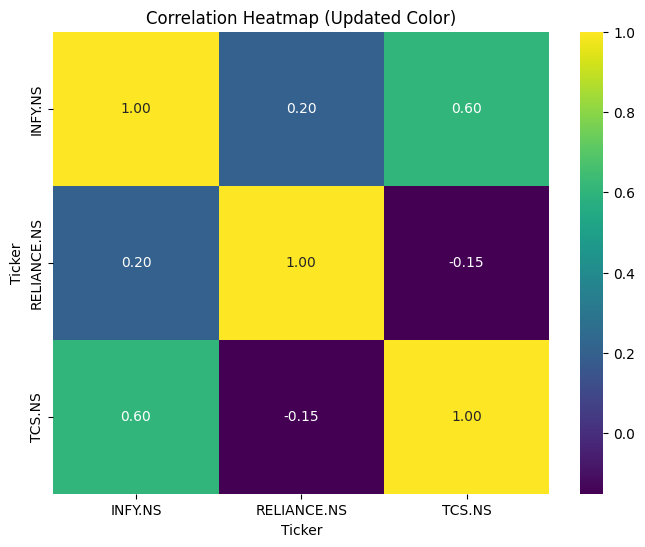

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cd[['INFY.NS', 'RELIANCE.NS', 'TCS.NS']].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap (Updated Color)")
plt.show()

* The strongest positive correlation (0.60) is between INFY.NS and TCS.NS, which is expected as both are major IT companies and their stock prices tend to move together.

* RELIANCE.NS shows a weaker positive correlation with INFY.NS (0.20) and a weak negative correlation with TCS.NS (-0.15), suggesting that its price movements are less directly tied to these two IT sector stocks.



# 19.Treemap (Plotly)

In [27]:
cd.drop(columns=['MA20', 'MA50'], inplace=True)


In [28]:
latest = cd.iloc[-1].reset_index()
latest.columns = ['Ticker', 'Price']   # rename columns

fig = px.treemap(latest, path=['Ticker'], values='Price')
fig.update_layout(title="Treemap - Stock Values")
fig.show()


* The Treemap visually represents the proportion of each stock's value compared to the total value of the three stocks combined on the last trading day in our dataset

## Advantages of using a Treemap for this data:


1.   Quick Comparison of Proportions
2.   Space-Efficient
3.   Immediate Identification of Dominant Categories



# 20.Significant Price Movements (News Mapping)

In [29]:
cd['Returns']=cd['RELIANCE.NS'].pct_change()
significant_move=cd[cd['Returns'].abs()>0.05]
print("significant moves (Reliance):\n ",significant_move[['RELIANCE.NS','Returns']])


significant moves (Reliance):
  Ticker      RELIANCE.NS   Returns
Date                             
2025-04-28   1363.35498  0.052599


Sudden >5% moves often align with earnings announcements like

"There was a lot of fear that something could happen on the border. The fact that nothing (major) has happened has given some hope to the market"

- said G Chokkalingam, founder and head of research at Equinomics Research.

Besides this, expectations of a bilateral trade agreement between India and the U.S., New Delhi's relative resilience to tariffs compared to China and interest in attractively valued large-caps such as Reliance could keep markets buoyant.

#21.Risk Analysis (Sharpe Ratio)

In [30]:
rel_returns=cd['RELIANCE.NS'].pct_change().dropna()
sharpe=np.mean(rel_returns)/np.std(rel_returns)
print("Reliance's Sharpe Ratio:",sharpe)

tcs_returns=cd['TCS.NS'].pct_change().dropna()
sharpe=np.mean(tcs_returns)/np.std(tcs_returns)
print("TCS's Sharpe Ratio:",sharpe)

infy_returns=cd['INFY.NS'].pct_change().dropna()
sharpe=np.mean(tcs_returns)/np.std(tcs_returns)
print("INFY's Sharpe Ratio:",sharpe)


Reliance's Sharpe Ratio: 0.09026473720864023
TCS's Sharpe Ratio: -0.07485535260439952
INFY's Sharpe Ratio: -0.07485535260439952


from these Sharpe Ratios:

Reliance (0.09) → Positive but very low, meaning returns barely compensate for the risk.

TCS & Infosys (-0.07) → Negative, meaning risk outweighs returns; investors would’ve been better off in a risk-free asset.

# 22.Forecasting with Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowcfbjig/ajsfqjyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowcfbjig/uurplzq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20174', 'data', 'file=/tmp/tmpowcfbjig/ajsfqjyg.json', 'init=/tmp/tmpowcfbjig/uurplzq_.json', 'output', 'file=/tmp/tmpowcfbjig/prophet_modelkvi9namy/prophet_model-20250827152434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


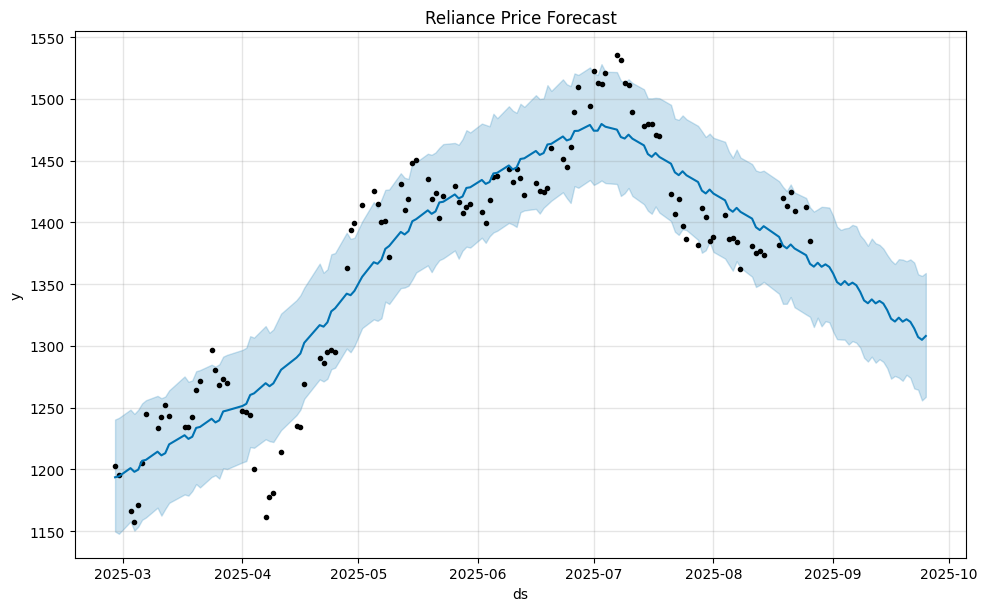

In [31]:
prophet_df = cd[['RELIANCE.NS']].reset_index()
prophet_df.rename(columns={"Date":"ds","RELIANCE.NS":"y"}, inplace=True)

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Reliance Price Forecast")
plt.show()


"Insight: Forecast shows expected upward drift but with confidence intervals widening, reflecting uncertainty."